# Análise de Fundos de Investimento Imobiliário (FIIs) com Python


<img src = 'https://i0.wp.com/blog.grana.capital/wp-content/uploads/2022/02/Tipos-de-fundos-imobiliarios-e-como-FIIs-funcionam.png?resize=800%2C620&ssl=1' width='700'>

**Objetivos:**
- Realizar Webscraping para coleta de dados no site Funds Explorer
- Fazer a limpeza e tratamento dos dados
- Análizar os dados de forma exploratória
- Encontrar os ativos que atendem as seguintes premiças de qualidade:
    - Vacância Física inferior a 10%
    - Yield Acumulado no último ano superior a 7.5%
    - Liquidez Diária maior que R$20.000,00
    - Mais de 5 ativos
    - Valor de mercado inferior ao valor patrimonial
- Avaliar o desempenho recente dos FIIs e comparar com índice IFIX

## 1. Bibliotecas utilizadas


In [ ]:
# Algumas das bibliotecas fundamentais nas técnicas de webscraping
# Bibliotecas opcionaisemenos representativas (por ex., seaborn para colorir dataframe) estarão dispostas ao 1longo do código
# A instalaçãoénecessária apenas na primeira vez de uso

!pip install requests
!pip install bs4
!pip install yfinance
!pip install alpha_vantage

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 63 kB 1.4 MB/s 
     |████████████████████████████████| 6.4 MB 11.2 MB/s 
  Attempting uninstall: requests
    Found existing installation: requests 2.23.0
    Uninstalling requests-2.23.0:
      Successfully uninstalled requests-2.23.0
  Attempting uninstall: lxml
    Found existing installation: lxml 4.2.6
    Uninstalling lxml-4.2.6:
      Successfully uninstalled lxml-4.2.6
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires requests~=2.23.0, but you have requests 2.27.1 which is incompatible.
datascien

### 1.1 Instalando Bibliotecas

In [ ]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import numpy as np
import plotly.express as px
import yfinance as yf

## 2. Webscraping para Rendimentos de Fundos Imobiliários(Fils)


Como o foco dessa liveéaanálise de Fundos Imobiliários, vamos aceleraraparte de webscraping dos dados. Se for do interesse do público,
podemos programar uma próxima live explorando apenasa mineração de dados na web

Site para Web Scrapping: https://www.fundsexplorer.com.br/ranking


In [ ]:
FII_url = requests.get("https://www.fundsexplorer.com.br/ranking")
FII_url

<Response [200]>

In [ ]:
#Código Fonte
FII_url.text

'<!DOCTYPE html>\n<html lang="pt-br">\n\n<head>\n<script type="text/javascript">window.NREUM||(NREUM={});NREUM.info={"beacon":"bam.nr-data.net","errorBeacon":"bam.nr-data.net","licenseKey":"7ae9c6eb2d","applicationID":"1576126089","transactionName":"IAkLQhFbWVUBQhdKVwcDFl8EWhpLBV5TUVwESQxYB1FN","queueTime":1,"applicationTime":15,"agent":""}</script>\n<script type="text/javascript">(window.NREUM||(NREUM={})).init={ajax:{deny_list:["bam.nr-data.net"]}};(window.NREUM||(NREUM={})).loader_config={licenseKey:"7ae9c6eb2d",applicationID:"1576126089"};window.NREUM||(NREUM={}),__nr_require=function(t,e,n){function r(n){if(!e[n]){var i=e[n]={exports:{}};t[n][0].call(i.exports,function(e){var i=t[n][1][e];return r(i||e)},i,i.exports)}return e[n].exports}if("function"==typeof __nr_require)return __nr_require;for(var i=0;i<n.length;i++)r(n[i]);return r}({1:[function(t,e,n){function r(){}function i(t,e,n,r){return function(){return s.recordSupportability("API/"+e+"/called"),o(t+e,[u.now()].concat(c(a

In [ ]:
FII_bs4 = BeautifulSoup(FII_url.text, "html.parser")
FII_bs4.head()

[<script type="text/javascript">window.NREUM||(NREUM={});NREUM.info={"beacon":"bam.nr-data.net","errorBeacon":"bam.nr-data.net","licenseKey":"7ae9c6eb2d","applicationID":"1576126089","transactionName":"IAkLQhFbWVUBQhdKVwcDFl8EWhpLBV5TUVwESQxYB1FN","queueTime":1,"applicationTime":15,"agent":""}</script>,
 <script type="text/javascript">(window.NREUM||(NREUM={})).init={ajax:{deny_list:["bam.nr-data.net"]}};(window.NREUM||(NREUM={})).loader_config={licenseKey:"7ae9c6eb2d",applicationID:"1576126089"};window.NREUM||(NREUM={}),__nr_require=function(t,e,n){function r(n){if(!e[n]){var i=e[n]={exports:{}};t[n][0].call(i.exports,function(e){var i=t[n][1][e];return r(i||e)},i,i.exports)}return e[n].exports}if("function"==typeof __nr_require)return __nr_require;for(var i=0;i<n.length;i++)r(n[i]);return r}({1:[function(t,e,n){function r(){}function i(t,e,n,r){return function(){return s.recordSupportability("API/"+e+"/called"),o(t+e,[u.now()].concat(c(arguments)),n?null:this,r),n?void 0:this}}var o=

In [ ]:
# "scroll-wrapper" obtido em inspecionar elemento. O elemento representa a tabela desejado no site.
FII_table = FII_bs4.findAll(attrs = {'id':'scroll-wrapper'})


In [ ]:
table = FII_table[0].findAll('table')


In [ ]:
# Elemento Beautiful Soup. Precisa ser transformado para tabela.
type(table)

bs4.element.ResultSet

In [ ]:
FII_df = pd.read_html(str(FII_table[0]))[0]

Aqui temos o diamante bruto, os dados de todos os Fils disponíveis (número de linhas do dataframe), com todos os seus multiplos
parametros (número de colunas df)

In [ ]:
#Obter colunas para avaliar se está certo
FII_df.columns

Index(['Códigodo fundo', 'Setor', 'Preço Atual', 'Liquidez Diária',
       'Dividendo', 'DividendYield', 'DY (3M)Acumulado', 'DY (6M)Acumulado',
       'DY (12M)Acumulado', 'DY (3M)Média', 'DY (6M)Média', 'DY (12M)Média',
       'DY Ano', 'Variação Preço', 'Rentab.Período', 'Rentab.Acumulada',
       'PatrimônioLíq.', 'VPA', 'P/VPA', 'DYPatrimonial',
       'VariaçãoPatrimonial', 'Rentab. Patr.no Período',
       'Rentab. Patr.Acumulada', 'VacânciaFísica', 'VacânciaFinanceira',
       'QuantidadeAtivos'],
      dtype='object')

In [ ]:
#Fundos Disponíveis
str(list(FII_df['Códigodo fundo'].sort_values()))



"['ABCP11', 'AFHI11', 'AFOF11', 'AIEC11', 'ALMI11', 'ALZR11', 'APTO11', 'ARCT11', 'ARRI11', 'ATSA11', 'BARI11', 'BBFI11B', 'BBFO11', 'BBGO11', 'BBIM11', 'BBPO11', 'BBRC11', 'BCFF11', 'BCIA11', 'BCRI11', 'BICE11', 'BICR11', 'BIME11', 'BLCA11', 'BLCP11', 'BLMC11', 'BLMG11', 'BLMO11', 'BLMR11', 'BMLC11', 'BNFS11', 'BPFF11', 'BPML11', 'BRCO11', 'BRCR11', 'BREV11', 'BRLA11', 'BTAL11', 'BTCR11', 'BTLG11', 'BTRA11', 'BTSG11', 'BTWR11', 'BZLI11', 'CACR11', 'CARE11', 'CBOP11', 'CCRF11', 'CEOC11', 'CJCT11', 'CNES11', 'CORM11', 'CPFF11', 'CPTS11', 'CRFF11', 'CTXT11', 'CVBI11', 'CXAG11', 'CXCE11B', 'CXCI11', 'CXCO11', 'CXRI11', 'CXTL11', 'CYCR11', 'DEVA11', 'DRIT11B', 'DVFF11', 'EDFO11B', 'EDGA11', 'EQIR11', 'ERCR11', 'ERPA11', 'EURO11', 'EVBI11', 'FAED11', 'FAMB11B', 'FATN11', 'FCFL11', 'FEXC11', 'FIGS11', 'FIIB11', 'FIIP11B', 'FISC11', 'FIVN11', 'FLCR11', 'FLMA11', 'FLRP11', 'FMOF11', 'FPAB11', 'FVPQ11', 'GALG11', 'GAME11', 'GCFF11', 'GCRA11', 'GCRI11', 'GESE11B', 'GGRC11', 'GSFI11', 'GTLG11', '

## 3. Organização dos dados extraídos


**Observação:** existem diversas formas muito mais elegantes de manipulação desses dados, usando estruturas condicionais e de repetição,
por exemplo
Entretanto, vamos tentar trazer essa manipulação usando funçõesemétodos mais simples, mesmo que exijam algumas etapas extras.

In [ ]:
#Faremos uma cópia do dataframe para manipulá-lo com mais liberdadee,caso
# editemos algo, possamos reverteraedição sem um novo webscraping

FII_df_backup = FII_df.copy()

In [ ]:
#Visualizar Data Frame
FII_df.head(10)

,Códigodo fundo,Setor,Preço Atual,Liquidez Diária,Dividendo,DividendYield,DY (3M)Acumulado,DY (6M)Acumulado,DY (12M)Acumulado,DY (3M)Média,...,PatrimônioLíq.,VPA,P/VPA,DYPatrimonial,VariaçãoPatrimonial,Rentab. Patr.no Período,Rentab. Patr.Acumulada,VacânciaFísica,VacânciaFinanceira,QuantidadeAtivos
0,FIVN11,Shoppings,"R$ 2,17",836.0,"R$ 0,00","0,00%","0,00%","0,00%","0,00%","0,00%",...,"R$ 65.678.487,99","R$ 6,98",31.0,NaN,NaN,NaN,NaN,"56,00%",NaN,1
1,BZLI11,Títulos e Val. Mob.,"R$ 14,70",44041.0,"R$ 0,00","0,00%","0,00%","0,00%","0,00%","0,00%",...,"R$ 431.076.817,02","R$ 10,70",137.0,NaN,NaN,NaN,NaN,NaN,NaN,0
2,XTED11,Lajes Corporativas,"R$ 6,18",1713.0,"R$ 0,00","0,00%","0,00%","0,00%","0,00%","0,00%",...,"R$ 27.305.951,24","R$ 13,89",44.0,NaN,NaN,NaN,NaN,"0,00%","100,00%",1
3,ALMI11,Lajes Corporativas,"R$ 930,00",37.0,"R$ 0,00","0,00%","0,00%","0,00%","0,00%","0,00%",...,"R$ 249.632.973,43","R$ 2.245,37",41.0,NaN,NaN,NaN,NaN,"64,05%",NaN,1
4,PABY11,Híbrido,"R$ 7,60",1.0,"R$ 0,00","0,00%","0,00%","0,00%","0,00%","0,00%",...,"R$ -9.546.407,61","R$ -12,59",-60.0,NaN,NaN,NaN,NaN,NaN,NaN,1
5,ORPD11,Títulos e Val. Mob.,"R$ 100,00",4.0,"R$ 1,38",NaN,NaN,NaN,NaN,NaN,...,"R$ 43.807.234,41","R$ 151,06",66.0,NaN,NaN,NaN,NaN,NaN,NaN,0
6,FISC11,Lajes Corporativas,"R$ 165,00",200.0,"R$ 0,22","0,00%","0,00%","0,00%","0,00%","0,00%",...,"R$ 258.955.140,83","R$ 152,33",108.0,NaN,NaN,NaN,NaN,NaN,NaN,0
7,BNFS11,Outros,"R$ 118,03",441.0,"R$ 1,42","1,20%","3,22%","6,37%","11,76%","1,07%",...,"R$ 69.417.286,55","R$ 99,17",119.0,"1,43%","0,01%","1,44%","5,44%","0,00%",NaN,18
8,HSML11,Shoppings,"R$ 77,66",30177.0,"R$ 0,60","0,74%","2,27%","4,37%","7,72%","0,76%",...,"R$ 1.479.543.692,13","R$ 93,76",83.0,"0,64%","-0,06%","0,58%","1,59%","4,50%",NaN,5
9,SHPH11,Shoppings,"R$ 788,99",1002.0,"R$ 3,35","0,41%","1,34%","2,81%","4,75%","0,45%",...,"R$ 540.384.470,89","R$ 887,40",89.0,"0,40%","-0,04%","0,36%","1,30%","10,80%",NaN,1


In [ ]:
FII_df.dtypes

Códigodo fundo              object
Setor                       object
Preço Atual                 object
Liquidez Diária            float64
Dividendo                   object
DividendYield               object
DY (3M)Acumulado            object
DY (6M)Acumulado            object
DY (12M)Acumulado           object
DY (3M)Média                object
DY (6M)Média                object
DY (12M)Média               object
DY Ano                      object
Variação Preço              object
Rentab.Período              object
Rentab.Acumulada            object
PatrimônioLíq.              object
VPA                         object
P/VPA                      float64
DYPatrimonial               object
VariaçãoPatrimonial         object
Rentab. Patr.no Período     object
Rentab. Patr.Acumulada      object
VacânciaFísica              object
VacânciaFinanceira          object
QuantidadeAtivos             int64
dtype: object

In [ ]:
FII_df['Preço Atual']

0        R$ 2,17
1       R$ 14,70
2        R$ 6,18
3      R$ 930,00
4        R$ 7,60
         ...    
277    R$ 382,57
278     R$ 86,92
279     R$ 77,00
280     R$ 76,36
281    R$ 116,00
Name: Preço Atual, Length: 282, dtype: object

In [ ]:
FII_df.iloc[0]

Códigodo fundo                       FIVN11
Setor                             Shoppings
Preço Atual                         R$ 2,17
Liquidez Diária                       836.0
Dividendo                           R$ 0,00
DividendYield                         0,00%
DY (3M)Acumulado                      0,00%
DY (6M)Acumulado                      0,00%
DY (12M)Acumulado                     0,00%
DY (3M)Média                          0,00%
DY (6M)Média                          0,00%
DY (12M)Média                         0,00%
DY Ano                                  NaN
Variação Preço                        0,00%
Rentab.Período                        0,00%
Rentab.Acumulada                      0,00%
PatrimônioLíq.             R$ 65.678.487,99
VPA                                 R$ 6,98
P/VPA                                  31.0
DYPatrimonial                           NaN
VariaçãoPatrimonial                     NaN
Rentab. Patr.no Período                 NaN
Rentab. Patr.Acumulada          

In [ ]:
FII_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 282 entries, 0 to 281
Data columns (total 26 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Códigodo fundo           282 non-null    object 
 1   Setor                    278 non-null    object 
 2   Preço Atual              274 non-null    object 
 3   Liquidez Diária          274 non-null    float64
 4   Dividendo                282 non-null    object 
 5   DividendYield            276 non-null    object 
 6   DY (3M)Acumulado         276 non-null    object 
 7   DY (6M)Acumulado         276 non-null    object 
 8   DY (12M)Acumulado        276 non-null    object 
 9   DY (3M)Média             276 non-null    object 
 10  DY (6M)Média             276 non-null    object 
 11  DY (12M)Média            276 non-null    object 
 12  DY Ano                   262 non-null    object 
 13  Variação Preço           276 non-null    object 
 14  Rentab.Período           2

OBS: Diversas correções são necessárias
- Limpar "R$"
- Excluir pontos de separação de milhar
- Trocar "," por "."
- Limpar "%"

In [ ]:
#Limpar "R$"
FII_df = FII_df.replace(to_replace = r'^R\$ ', value = '', regex = True)

In [ ]:
FII_df.head()

,Códigodo fundo,Setor,Preço Atual,Liquidez Diária,Dividendo,DividendYield,DY (3M)Acumulado,DY (6M)Acumulado,DY (12M)Acumulado,DY (3M)Média,...,PatrimônioLíq.,VPA,P/VPA,DYPatrimonial,VariaçãoPatrimonial,Rentab. Patr.no Período,Rentab. Patr.Acumulada,VacânciaFísica,VacânciaFinanceira,QuantidadeAtivos
0,FIVN11,Shoppings,"2,17",836.0,"0,00","0,00%","0,00%","0,00%","0,00%","0,00%",...,"65.678.487,99","6,98",31.0,NaN,NaN,NaN,NaN,"56,00%",NaN,1
1,BZLI11,Títulos e Val. Mob.,"14,70",44041.0,"0,00","0,00%","0,00%","0,00%","0,00%","0,00%",...,"431.076.817,02","10,70",137.0,NaN,NaN,NaN,NaN,NaN,NaN,0
2,XTED11,Lajes Corporativas,"6,18",1713.0,"0,00","0,00%","0,00%","0,00%","0,00%","0,00%",...,"27.305.951,24","13,89",44.0,NaN,NaN,NaN,NaN,"0,00%","100,00%",1
3,ALMI11,Lajes Corporativas,"930,00",37.0,"0,00","0,00%","0,00%","0,00%","0,00%","0,00%",...,"249.632.973,43","2.245,37",41.0,NaN,NaN,NaN,NaN,"64,05%",NaN,1
4,PABY11,Híbrido,"7,60",1.0,"0,00","0,00%","0,00%","0,00%","0,00%","0,00%",...,"-9.546.407,61","-12,59",-60.0,NaN,NaN,NaN,NaN,NaN,NaN,1


In [ ]:
#Outro problema é o separador decimal(atualmente como virgula). Entretanto, não podemos simplesmente substituir por ","
#Agravante extra: em algumas columas o separador decimal está como ',' e outros como '.'
FII_df['PatrimônioLíq.']

0         65.678.487,99
1        431.076.817,02
2         27.305.951,24
3        249.632.973,43
4         -9.546.407,61
             ...       
277       50.992.934,89
278      195.230.258,40
279      376.309.193,73
280      489.344.835,30
281    2.187.502.617,24
Name: PatrimônioLíq., Length: 282, dtype: object

In [ ]:
FII_df['PatrimônioLíq.'] = FII_df['PatrimônioLíq.'].str.replace('.','')
FII_df['Preço Atual'] = FII_df['Preço Atual'].str.replace('.','')
FII_df['Dividendo'] = FII_df['Dividendo'].str.replace('.','')
FII_df['VPA'] = FII_df['VPA'].str.replace('.','')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: Fut

In [ ]:
FII_df.head()

,Códigodo fundo,Setor,Preço Atual,Liquidez Diária,Dividendo,DividendYield,DY (3M)Acumulado,DY (6M)Acumulado,DY (12M)Acumulado,DY (3M)Média,...,PatrimônioLíq.,VPA,P/VPA,DYPatrimonial,VariaçãoPatrimonial,Rentab. Patr.no Período,Rentab. Patr.Acumulada,VacânciaFísica,VacânciaFinanceira,QuantidadeAtivos
0,FIVN11,Shoppings,"2,17",836.0,"0,00","0,00%","0,00%","0,00%","0,00%","0,00%",...,"65678487,99","6,98",31.0,NaN,NaN,NaN,NaN,"56,00%",NaN,1
1,BZLI11,Títulos e Val. Mob.,"14,70",44041.0,"0,00","0,00%","0,00%","0,00%","0,00%","0,00%",...,"431076817,02","10,70",137.0,NaN,NaN,NaN,NaN,NaN,NaN,0
2,XTED11,Lajes Corporativas,"6,18",1713.0,"0,00","0,00%","0,00%","0,00%","0,00%","0,00%",...,"27305951,24","13,89",44.0,NaN,NaN,NaN,NaN,"0,00%","100,00%",1
3,ALMI11,Lajes Corporativas,"930,00",37.0,"0,00","0,00%","0,00%","0,00%","0,00%","0,00%",...,"249632973,43","2245,37",41.0,NaN,NaN,NaN,NaN,"64,05%",NaN,1
4,PABY11,Híbrido,"7,60",1.0,"0,00","0,00%","0,00%","0,00%","0,00%","0,00%",...,"-9546407,61","-12,59",-60.0,NaN,NaN,NaN,NaN,NaN,NaN,1


In [ ]:
FII_df['PatrimônioLíq.'] = FII_df['PatrimônioLíq.'].str.replace('.','')
FII_df['Preço Atual'] = FII_df['Preço Atual'].str.replace('.','')
FII_df['Dividendo'] = FII_df['Dividendo'].str.replace('.','')
FII_df['VPA'] = FII_df['VPA'].str.replace('.','')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: Fut

In [ ]:
FII_df["PatrimônioLíq."]

0        65678487,99
1       431076817,02
2        27305951,24
3       249632973,43
4        -9546407,61
           ...      
277      50992934,89
278     195230258,40
279     376309193,73
280     489344835,30
281    2187502617,24
Name: PatrimônioLíq., Length: 282, dtype: object

In [ ]:
FII_df.head()

,Códigodo fundo,Setor,Preço Atual,Liquidez Diária,Dividendo,DividendYield,DY (3M)Acumulado,DY (6M)Acumulado,DY (12M)Acumulado,DY (3M)Média,...,PatrimônioLíq.,VPA,P/VPA,DYPatrimonial,VariaçãoPatrimonial,Rentab. Patr.no Período,Rentab. Patr.Acumulada,VacânciaFísica,VacânciaFinanceira,QuantidadeAtivos
0,FIVN11,Shoppings,"2,17",836.0,"0,00","0,00%","0,00%","0,00%","0,00%","0,00%",...,"65678487,99","6,98",31.0,NaN,NaN,NaN,NaN,"56,00%",NaN,1
1,BZLI11,Títulos e Val. Mob.,"14,70",44041.0,"0,00","0,00%","0,00%","0,00%","0,00%","0,00%",...,"431076817,02","10,70",137.0,NaN,NaN,NaN,NaN,NaN,NaN,0
2,XTED11,Lajes Corporativas,"6,18",1713.0,"0,00","0,00%","0,00%","0,00%","0,00%","0,00%",...,"27305951,24","13,89",44.0,NaN,NaN,NaN,NaN,"0,00%","100,00%",1
3,ALMI11,Lajes Corporativas,"930,00",37.0,"0,00","0,00%","0,00%","0,00%","0,00%","0,00%",...,"249632973,43","2245,37",41.0,NaN,NaN,NaN,NaN,"64,05%",NaN,1
4,PABY11,Híbrido,"7,60",1.0,"0,00","0,00%","0,00%","0,00%","0,00%","0,00%",...,"-9546407,61","-12,59",-60.0,NaN,NaN,NaN,NaN,NaN,NaN,1


In [ ]:
FII_df["PatrimônioLíq."] = FII_df["PatrimônioLíq."].astype(str).str.replace(',', '.')
FII_df["Preço Atual"] = FII_df["Preço Atual"].astype(str).str.replace(',', '.')
FII_df["Dividendo"] = FII_df["Dividendo"].astype(str).str.replace(',', '.')
FII_df["VPA"] = FII_df["VPA"].astype(str).str.replace(',', '.')

In [ ]:
#Cota de FII mais cara
np.max(FII_df["Preço Atual"])

'nan'

In [ ]:
#Cota de FII mais barata
np.min(FII_df['Preço Atual'] )

'1.00'

In [ ]:
#Menor Pat. Líquido
np.min(FII_df['PatrimônioLíq.'] )

'-9546407.61'

In [ ]:
#Transpor o DF. Linhas em Colunas e Colunas em Linhas
FII_df.iloc[0:10].transpose()

,0,1,2,3,4,5,6,7,8,9
Códigodo fundo,FIVN11,BZLI11,XTED11,ALMI11,PABY11,ORPD11,FISC11,BNFS11,HSML11,SHPH11
Setor,Shoppings,Títulos e Val. Mob.,Lajes Corporativas,Lajes Corporativas,Híbrido,Títulos e Val. Mob.,Lajes Corporativas,Outros,Shoppings,Shoppings
Preço Atual,2.17,14.70,6.18,930.00,7.60,100.00,165.00,118.03,77.66,788.99
Liquidez Diária,836.0,44041.0,1713.0,37.0,1.0,4.0,200.0,441.0,30177.0,1002.0
Dividendo,0.00,0.00,0.00,0.00,0.00,1.38,0.22,1.42,0.60,3.35
DividendYield,"0,00%","0,00%","0,00%","0,00%","0,00%",NaN,"0,00%","1,20%","0,74%","0,41%"
DY (3M)Acumulado,"0,00%","0,00%","0,00%","0,00%","0,00%",NaN,"0,00%","3,22%","2,27%","1,34%"
DY (6M)Acumulado,"0,00%","0,00%","0,00%","0,00%","0,00%",NaN,"0,00%","6,37%","4,37%","2,81%"
DY (12M)Acumulado,"0,00%","0,00%","0,00%","0,00%","0,00%",NaN,"0,00%","11,76%","7,72%","4,75%"
DY (3M)Média,"0,00%","0,00%","0,00%","0,00%","0,00%",NaN,"0,00%","1,07%","0,76%","0,45%"


Limpar "%"

In [ ]:
FII_df = FII_df.replace(to_replace = r'%$', value = '', regex = True)
FII_df.head()

,Códigodo fundo,Setor,Preço Atual,Liquidez Diária,Dividendo,DividendYield,DY (3M)Acumulado,DY (6M)Acumulado,DY (12M)Acumulado,DY (3M)Média,...,PatrimônioLíq.,VPA,P/VPA,DYPatrimonial,VariaçãoPatrimonial,Rentab. Patr.no Período,Rentab. Patr.Acumulada,VacânciaFísica,VacânciaFinanceira,QuantidadeAtivos
0,FIVN11,Shoppings,2.17,836.0,0.00,"0,00","0,00","0,00","0,00","0,00",...,65678487.99,6.98,31.0,NaN,NaN,NaN,NaN,"56,00",NaN,1
1,BZLI11,Títulos e Val. Mob.,14.70,44041.0,0.00,"0,00","0,00","0,00","0,00","0,00",...,431076817.02,10.70,137.0,NaN,NaN,NaN,NaN,NaN,NaN,0
2,XTED11,Lajes Corporativas,6.18,1713.0,0.00,"0,00","0,00","0,00","0,00","0,00",...,27305951.24,13.89,44.0,NaN,NaN,NaN,NaN,"0,00","100,00",1
3,ALMI11,Lajes Corporativas,930.00,37.0,0.00,"0,00","0,00","0,00","0,00","0,00",...,249632973.43,2245.37,41.0,NaN,NaN,NaN,NaN,"64,05",NaN,1
4,PABY11,Híbrido,7.60,1.0,0.00,"0,00","0,00","0,00","0,00","0,00",...,-9546407.61,-12.59,-60.0,NaN,NaN,NaN,NaN,NaN,NaN,1


In [ ]:
set(FII_df.Setor)

{'Hospital',
 'Hotel',
 'Híbrido',
 'Lajes Corporativas',
 'Logística',
 'Outros',
 'Residencial',
 'Shoppings',
 'Títulos e Val. Mob.',
 nan}

In [ ]:
FII_df['DividendYield'] = FII_df['DividendYield'].str.replace(',','.').astype(float)
FII_df['DY (3M)Acumulado'] = FII_df['DY (3M)Acumulado'].str.replace(',','.').astype(float)
FII_df['DY (6M)Acumulado'] = FII_df['DY (6M)Acumulado'].str.replace(',','.').astype(float)
FII_df['DY (12M)Acumulado'] = FII_df['DY (12M)Acumulado'].str.replace(',','.').astype(float)
FII_df['DY (3M)Média'] = FII_df['DY (3M)Média'].str.replace(',','.').astype(float)
FII_df['DY (6M)Média'] = FII_df['DY (6M)Média'].str.replace(',','.').astype(float)
FII_df['DY (12M)Média'] = FII_df['DY (12M)Média'].str.replace(',','.').astype(float)
FII_df['DY Ano'] = FII_df['DY Ano'].str.replace(',','.').astype(float)
FII_df['Variação Preço'] = FII_df['Variação Preço'].str.replace(',','.').astype(float)
FII_df['Rentab.Período'] = FII_df['Rentab.Período'].str.replace(',','.').astype(float)
FII_df['Rentab.Acumulada'] = FII_df['Rentab.Acumulada'].str.replace(',','.').astype(float)
FII_df['DYPatrimonial'] = FII_df['DYPatrimonial'].str.replace(',','.').astype(float)
FII_df['VariaçãoPatrimonial'] = FII_df['VariaçãoPatrimonial'].str.replace(',','.').astype(float)
FII_df['Rentab. Patr.no Período'] = FII_df['Rentab. Patr.no Período'].str.replace(',','.').astype(float)
FII_df['Rentab. Patr.Acumulada'] = FII_df['Rentab. Patr.Acumulada'].str.replace(',','.').astype(float)
FII_df['VacânciaFísica'] = FII_df['VacânciaFísica'].str.replace(',','.').astype(float)
FII_df['VacânciaFinanceira'] = FII_df['VacânciaFinanceira'].str.replace(',','.').astype(float)

In [ ]:
FII_df.head()

,Códigodo fundo,Setor,Preço Atual,Liquidez Diária,Dividendo,DividendYield,DY (3M)Acumulado,DY (6M)Acumulado,DY (12M)Acumulado,DY (3M)Média,...,PatrimônioLíq.,VPA,P/VPA,DYPatrimonial,VariaçãoPatrimonial,Rentab. Patr.no Período,Rentab. Patr.Acumulada,VacânciaFísica,VacânciaFinanceira,QuantidadeAtivos
0,FIVN11,Shoppings,2.17,836.0,0.00,0.0,0.0,0.0,0.0,0.0,...,65678487.99,6.98,31.0,NaN,NaN,NaN,NaN,56.00,NaN,1
1,BZLI11,Títulos e Val. Mob.,14.70,44041.0,0.00,0.0,0.0,0.0,0.0,0.0,...,431076817.02,10.70,137.0,NaN,NaN,NaN,NaN,NaN,NaN,0
2,XTED11,Lajes Corporativas,6.18,1713.0,0.00,0.0,0.0,0.0,0.0,0.0,...,27305951.24,13.89,44.0,NaN,NaN,NaN,NaN,0.00,100.0,1
3,ALMI11,Lajes Corporativas,930.00,37.0,0.00,0.0,0.0,0.0,0.0,0.0,...,249632973.43,2245.37,41.0,NaN,NaN,NaN,NaN,64.05,NaN,1
4,PABY11,Híbrido,7.60,1.0,0.00,0.0,0.0,0.0,0.0,0.0,...,-9546407.61,-12.59,-60.0,NaN,NaN,NaN,NaN,NaN,NaN,1


In [ ]:
# DY
np.max(FII_df['DividendYield'])

2.9

In [ ]:
FII_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 282 entries, 0 to 281
Data columns (total 26 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Códigodo fundo           282 non-null    object 
 1   Setor                    278 non-null    object 
 2   Preço Atual              282 non-null    object 
 3   Liquidez Diária          274 non-null    float64
 4   Dividendo                282 non-null    object 
 5   DividendYield            276 non-null    float64
 6   DY (3M)Acumulado         276 non-null    float64
 7   DY (6M)Acumulado         276 non-null    float64
 8   DY (12M)Acumulado        276 non-null    float64
 9   DY (3M)Média             276 non-null    float64
 10  DY (6M)Média             276 non-null    float64
 11  DY (12M)Média            276 non-null    float64
 12  DY Ano                   262 non-null    float64
 13  Variação Preço           276 non-null    float64
 14  Rentab.Período           2

In [ ]:
# Percentual de NAN na coluna
FII_df.isna().sum()/len(FII_df)*100

Códigodo fundo              0.000000
Setor                       1.418440
Preço Atual                 0.000000
Liquidez Diária             2.836879
Dividendo                   0.000000
DividendYield               2.127660
DY (3M)Acumulado            2.127660
DY (6M)Acumulado            2.127660
DY (12M)Acumulado           2.127660
DY (3M)Média                2.127660
DY (6M)Média                2.127660
DY (12M)Média               2.127660
DY Ano                      7.092199
Variação Preço              2.127660
Rentab.Período              2.127660
Rentab.Acumulada            2.127660
PatrimônioLíq.              0.000000
VPA                         0.000000
P/VPA                       2.836879
DYPatrimonial              12.411348
VariaçãoPatrimonial        12.411348
Rentab. Patr.no Período    12.411348
Rentab. Patr.Acumulada     12.411348
VacânciaFísica             56.382979
VacânciaFinanceira         89.361702
QuantidadeAtivos            0.000000
dtype: float64

In [ ]:
#Excluir linhas com NAN nas colunas 'Preço Atual', 'DividendYield', 'Setor
FII_df.dropna(subset = ['Preço Atual', 'DividendYield', 'Setor'], inplace = True)
FII_df.shape

(272, 26)

In [ ]:
FII_df.head(10)

,Códigodo fundo,Setor,Preço Atual,Liquidez Diária,Dividendo,DividendYield,DY (3M)Acumulado,DY (6M)Acumulado,DY (12M)Acumulado,DY (3M)Média,...,PatrimônioLíq.,VPA,P/VPA,DYPatrimonial,VariaçãoPatrimonial,Rentab. Patr.no Período,Rentab. Patr.Acumulada,VacânciaFísica,VacânciaFinanceira,QuantidadeAtivos
0,FIVN11,Shoppings,2.17,836.0,0.00,0.00,0.00,0.00,0.00,0.00,...,65678487.99,6.98,31.0,NaN,NaN,NaN,NaN,56.00,NaN,1
1,BZLI11,Títulos e Val. Mob.,14.70,44041.0,0.00,0.00,0.00,0.00,0.00,0.00,...,431076817.02,10.70,137.0,NaN,NaN,NaN,NaN,NaN,NaN,0
2,XTED11,Lajes Corporativas,6.18,1713.0,0.00,0.00,0.00,0.00,0.00,0.00,...,27305951.24,13.89,44.0,NaN,NaN,NaN,NaN,0.00,100.0,1
3,ALMI11,Lajes Corporativas,930.00,37.0,0.00,0.00,0.00,0.00,0.00,0.00,...,249632973.43,2245.37,41.0,NaN,NaN,NaN,NaN,64.05,NaN,1
4,PABY11,Híbrido,7.60,1.0,0.00,0.00,0.00,0.00,0.00,0.00,...,-9546407.61,-12.59,-60.0,NaN,NaN,NaN,NaN,NaN,NaN,1
6,FISC11,Lajes Corporativas,165.00,200.0,0.22,0.00,0.00,0.00,0.00,0.00,...,258955140.83,152.33,108.0,NaN,NaN,NaN,NaN,NaN,NaN,0
7,BNFS11,Outros,118.03,441.0,1.42,1.20,3.22,6.37,11.76,1.07,...,69417286.55,99.17,119.0,1.43,0.01,1.44,5.44,0.00,NaN,18
8,HSML11,Shoppings,77.66,30177.0,0.60,0.74,2.27,4.37,7.72,0.76,...,1479543692.13,93.76,83.0,0.64,-0.06,0.58,1.59,4.50,NaN,5
9,SHPH11,Shoppings,788.99,1002.0,3.35,0.41,1.34,2.81,4.75,0.45,...,540384470.89,887.40,89.0,0.40,-0.04,0.36,1.30,10.80,NaN,1
10,SPTW11,Lajes Corporativas,44.08,3630.0,0.40,0.90,2.71,5.30,16.30,0.90,...,95065138.49,52.87,83.0,0.76,0.06,0.81,3.30,0.00,NaN,1


In [ ]:
FII_df['Preço Atual'] = FII_df['Preço Atual'].astype(float)
FII_df['PatrimônioLíq.'] = FII_df['PatrimônioLíq.'].astype(float)

##4. Análise Estatística e Exploratória

In [ ]:
FII_df.head()

,Códigodo fundo,Setor,Preço Atual,Liquidez Diária,Dividendo,DividendYield,DY (3M)Acumulado,DY (6M)Acumulado,DY (12M)Acumulado,DY (3M)Média,...,PatrimônioLíq.,VPA,P/VPA,DYPatrimonial,VariaçãoPatrimonial,Rentab. Patr.no Período,Rentab. Patr.Acumulada,VacânciaFísica,VacânciaFinanceira,QuantidadeAtivos
0,FIVN11,Shoppings,2.17,836.0,0.00,0.0,0.0,0.0,0.0,0.0,...,6.567849e+07,6.98,31.0,NaN,NaN,NaN,NaN,56.00,NaN,1
1,BZLI11,Títulos e Val. Mob.,14.70,44041.0,0.00,0.0,0.0,0.0,0.0,0.0,...,4.310768e+08,10.70,137.0,NaN,NaN,NaN,NaN,NaN,NaN,0
2,XTED11,Lajes Corporativas,6.18,1713.0,0.00,0.0,0.0,0.0,0.0,0.0,...,2.730595e+07,13.89,44.0,NaN,NaN,NaN,NaN,0.00,100.0,1
3,ALMI11,Lajes Corporativas,930.00,37.0,0.00,0.0,0.0,0.0,0.0,0.0,...,2.496330e+08,2245.37,41.0,NaN,NaN,NaN,NaN,64.05,NaN,1
4,PABY11,Híbrido,7.60,1.0,0.00,0.0,0.0,0.0,0.0,0.0,...,-9.546408e+06,-12.59,-60.0,NaN,NaN,NaN,NaN,NaN,NaN,1


### Valor Patrimônial Total dos FIIs listados e Maiores FIIs

In [ ]:
# Qual a soma total dos Patrimonios Líquidos dos FIIs
VPA_total = FII_df['PatrimônioLíq.'].sum()
print(f'VALOR PATRONIAL TOTAL dos FIIs da Bolsa: R${VPA_total:,.2f}')

VALOR PATRONIAL TOTAL dos FIIs da Bolsa: R$144,906,819,301.76


In [ ]:
# Quais os 5 maiores FIIs listados
cinco_maiores = FII_df.sort_values(by='PatrimônioLíq.', ascending=False)[:5]
cinco_maiores_ed = cinco_maiores[['Códigodo fundo', 'Setor', 'PatrimônioLíq.']]
display(cinco_maiores_ed)
print()
print(f'O maior fundo tem R${cinco_maiores_ed.iloc[0, 2]/10**9:,.2f} bilhões de reais de Patrimônio Líquido')

,Códigodo fundo,Setor,PatrimônioLíq.
109,KNIP11,Títulos e Val. Mob.,6.947212e+09
276,KNCR11,Títulos e Val. Mob.,3.953092e+09
61,KNRI11,Híbrido,3.796587e+09
237,IRDM11,Títulos e Val. Mob.,3.202718e+09
85,HGLG11,Logística,3.166942e+09



O maior fundo tem R$6.95 bilhões de reais de Patrimônio Líquido


### Dividend Yield médio no último ano

In [ ]:
DY_medio = FII_df['DY (12M)Acumulado'].mean()
print(f'Dividend Yield anual médio dos FIIs da Bolsa: {DY_medio:,.2f}%')

Dividend Yield anual médio dos FIIs da Bolsa: 7.42%


In [ ]:
# Quais os 5 maiores FIIs listados
cinco_maiores = FII_df.sort_values(by='DY (12M)Acumulado', ascending=False)[:5]
cinco_maiores_ed = cinco_maiores[['Códigodo fundo', 'Setor', 'DY (12M)Acumulado']]
display(cinco_maiores_ed)
print()
print(f'O maior Dividend Yield no último ano foi de {cinco_maiores_ed.iloc[0, 2]:,.2f}%')

,Códigodo fundo,Setor,DY (12M)Acumulado
75,URPR11,Outros,18.42
83,VGHF11,Títulos e Val. Mob.,16.63
137,NEWU11,Lajes Corporativas,16.63
10,SPTW11,Lajes Corporativas,16.30
264,ARRI11,Títulos e Val. Mob.,15.68



O maior Dividend Yield no último ano foi de 18.42%


### Distribuição de FIIs por setor

In [ ]:
px.histogram(FII_df, x='Setor', title='Distribuição de FIIs por setor')

### Estatísticas dos Setores (Médias)

In [ ]:
FII_df.groupby('Setor')[['DY (12M)Média', 'VacânciaFísica', 'QuantidadeAtivos']].mean()

,DY (12M)Média,VacânciaFísica,QuantidadeAtivos
Setor,,,
Hospital,0.713333,0.000000,1.000000
Hotel,0.570000,64.950000,9.333333
Híbrido,0.554043,5.922222,3.765957
Lajes Corporativas,0.576923,26.214595,4.256410
Logística,0.652727,7.609524,7.409091
Outros,0.738611,5.710625,6.194444
Residencial,0.154444,15.200000,0.666667
Shoppings,0.438182,10.806364,4.454545
Títulos e Val. Mob.,0.702418,0.000000,0.065934


In [ ]:
px.strip(FII_df, y='VacânciaFísica', color="Setor", title='Distribuição da Vacância por setor', hover_name='Códigodo fundo')

**Conclusões:** Impacto da COVID-19 nos FIIs
- **Lajes Corporativas** e **Hóteis** apresentam as vacâncias mais altas entre os setores.
- **Logística** e **Hospitais** apresentam resultados mais baixos de vacância.
- **Shoppings** conseguiram manter uma vacância baixa, mas tem rentabilidades mais baixas de Yield.

In [ ]:
px.scatter(FII_df, y='DY (12M)Média', x='Preço Atual', color='Setor', log_x=True, range_x=[2,100000], hover_name='Códigodo fundo')

In [ ]:
px.histogram(FII_df, 'DY (12M)Média', nbins=40, height=400)

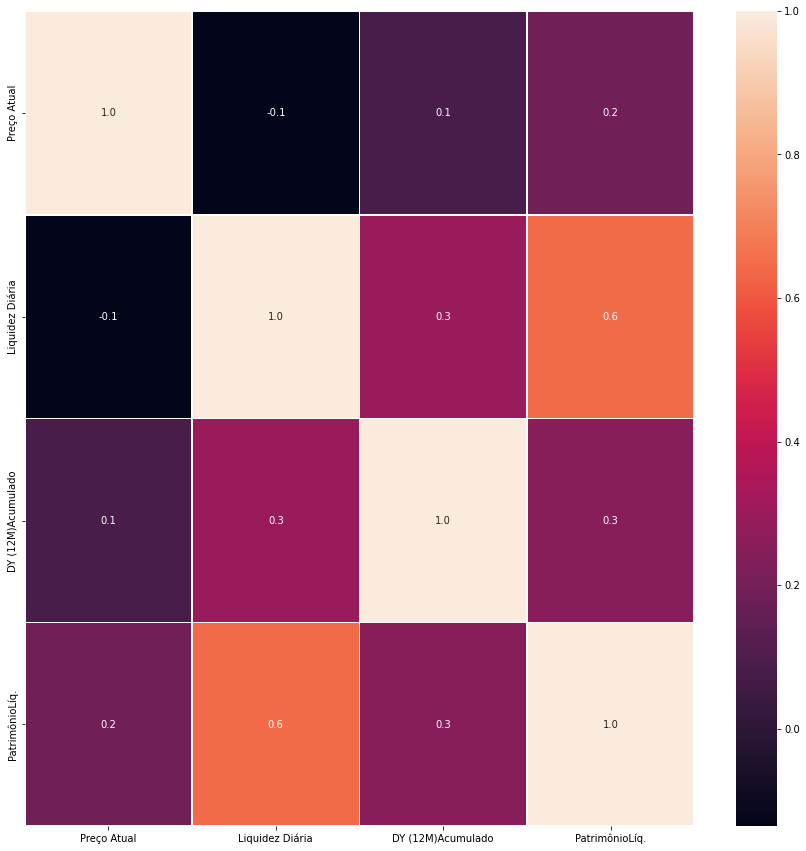

In [ ]:
FII_df_corr = FII_df[['Preço Atual', 'Liquidez Diária', 'DY (12M)Acumulado', 'PatrimônioLíq.', 'VPA']]

import matplotlib.pyplot as plt
import seaborn as sns

fig,ax =  plt.subplots(figsize=(15,15))
corr_matrix = FII_df_corr.corr(method="spearman") #Spearman: método para lidar com os outliers presentes
plot = sns.heatmap(corr_matrix, annot = True, fmt=".1f", linewidths=0.7, )
plt.rcParams.update({'font.size':10})

## 5. Escolha e Avaliação dos Ativos

### 5.1 Premiças

**Buscamos ativos que atendam às sequintes requisitos:**

- Vacância Física inferior a 10%
- Yield Acumulado no último ano superior a 7.5%
- Liquidez Diária maior que R$20.000,00
- Mais de 5 ativos
- Valor de mercado inferior ao valor patrimonial

### 5.2 Seleção

In [ ]:
FII_df.query("`VacânciaFísica` <= 10 \
             and `DY (12M)Acumulado` > 7.5 \
             and `Liquidez Diária` >= 20000 \
             and `QuantidadeAtivos` > 5 \
             and `P/VPA` < 100")

,Códigodo fundo,Setor,Preço Atual,Liquidez Diária,Dividendo,DividendYield,DY (3M)Acumulado,DY (6M)Acumulado,DY (12M)Acumulado,DY (3M)Média,...,PatrimônioLíq.,VPA,P/VPA,DYPatrimonial,VariaçãoPatrimonial,Rentab. Patr.no Período,Rentab. Patr.Acumulada,VacânciaFísica,VacânciaFinanceira,QuantidadeAtivos
112,XPLG11,Logística,95.45,36719.0,0.66,0.67,2.07,4.05,7.57,0.69,...,3.069299e+09,113.25,84.0,0.58,-0.19,0.40,5.51,8.8,1.2,13
133,VINO11,Lajes Corporativas,47.00,28046.0,0.34,0.66,2.10,4.63,9.84,0.70,...,9.045083e+08,54.60,86.0,0.62,-0.64,-0.02,1.00,4.2,NaN,9
281,HGRU11,Híbrido,116.00,27431.0,0.82,0.71,2.12,4.09,7.94,0.71,...,2.187503e+09,118.84,98.0,0.69,0.01,0.70,2.78,0.0,0.0,17


Para a análise realizada em 24/05/2022, os seguintes ativos foram selecionados:

- XPLG11: https://www.fundsexplorer.com.br/funds/xplg11
- VINO11: https://www.fundsexplorer.com.br/funds/vino11
- HGRU11: https://www.fundsexplorer.com.br/funds/hgru11

### 5.3 Análise dos Fundos

In [ ]:
dados = yf.download('XPLG11.SA VINO11.SA	HGRU11.SA', start='2021-05-18', end='2022-05-18', period='1d', group_by='tickers')


fig = px.line(dados, x=dados.index, y=dados['XPLG11.SA']['Close'], title='XPLG11: Valor da cota', height=400)
fig.show()
fig = px.line(dados, x=dados.index, y=dados['VINO11.SA']['Close'], title='VINO11: Valor da cota', height=400)
fig.show()
fig = px.line(dados, x=dados.index, y=dados['HGRU11.SA']['Close'], title='HGRU11: Valor da cota', height=400)
fig.show()

[*********************100%***********************]  3 of 3 completed


### 5.4 Obtendo o IFIX

**Obtendo o índice Geral de Fundos Imobiliários:**

O IFIX representa uma carteira teórica com os fundos imobiliários mais negociados do mercado. Esse índice foi criado pela B3, bolsa de valores brasileira, em 2012, com o objetivo de mostrar o retorno médio dos FIIs.

In [ ]:
from alpha_vantage.timeseries import TimeSeries

api_key = '79IC3GD97MV7G9M3'
ts = TimeSeries(key= api_key, output_format="pandas")

ts.get_symbol_search('ifix')

(           1. symbol              2. name 3. type         4. region  \
 date                                                                  
 1970-01-01  IFIX.SAO  INDICE DE FII INDEX  Equity  Brazil/Sao Paolo   
 
            5. marketOpen 6. marketClose 7. timezone 8. currency 9. matchScore  
 date                                                                           
 1970-01-01         10:00          17:30      UTC-03         BRL        0.7273  ,
 None)

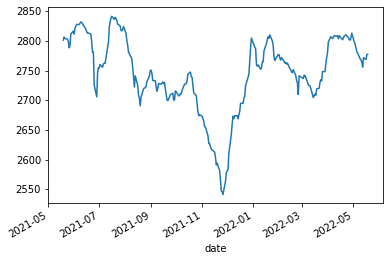

In [ ]:
data_final =  '2022-05-18'
data_inicial = '2021-05-18'

data, meta_data = ts.get_daily("IFIX.SAO", outputsize='full')
ifix = data.loc[data_inicial:data_final, '4. close']
ifix.plot()

### 5.5 Comparando o IFIX com os FIIs selecionados

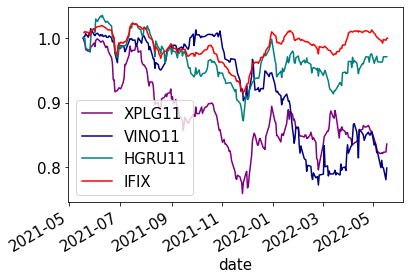

In [ ]:
import matplotlib.pyplot as plt

#Calculando Valores Ajustados
XPLG11_AJUSTADO = dados['XPLG11.SA']['Close']/dados['XPLG11.SA']['Close'].iloc[0]
VINO11_AJUSTADO = dados['VINO11.SA']['Close']/dados['VINO11.SA']['Close'].iloc[0]
HGRU11_AJUSTADO = dados['HGRU11.SA']['Close']/dados['HGRU11.SA']['Close'].iloc[0]
ifix_AJUSTADO = ifix/(ifix.iloc[0])

XPLG11_AJUSTADO.plot(label='XPLG11', color='purple')
VINO11_AJUSTADO.plot(label='VINO11', color='navy')
HGRU11_AJUSTADO.plot(label='HGRU11', color='teal')
ifix_AJUSTADO.plot(label='IFIX', color='r')

plt.legend()
plt.show()

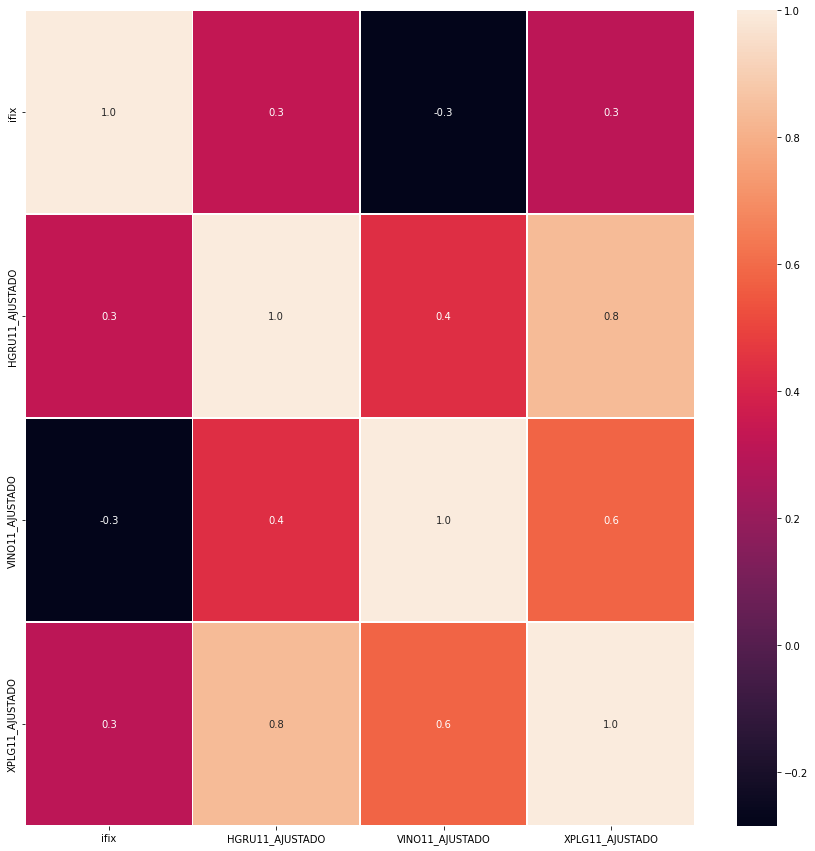

In [ ]:
ifix_corr = pd.DataFrame({'ifix':ifix_AJUSTADO.values,
                        'HGRU11_AJUSTADO':HGRU11_AJUSTADO.values,
                        'VINO11_AJUSTADO':VINO11_AJUSTADO.values,
                        'XPLG11_AJUSTADO':XPLG11_AJUSTADO.values})

ifix_corr.corr(method='pearson')

fig,ax =  plt.subplots(figsize=(15,15))
corr_matrix = ifix_corr.corr(method='pearson')
plot = sns.heatmap(corr_matrix, annot = True, fmt=".1f", linewidths=0.7, )
plt.rcParams.update({'font.size':15})